# Vectors in Octave

When using a Notebook, remember to use shift-return to execute each cell.

<b>This is an Octave notebook.  All commands are Octave commands.</b>

For this notebook to execute Octave commands in Jupyter on your machine,
you must first:
<ul><li>install Octave (from <a target="_blank" href="http://gnu.org">GNU.org</a>)</li>
<li>install the Octave kernel for Jupyter:
<blockquote><pre>
sudo   pip install octave_kernel
sudo   python  -m  octave_kernel  install
</pre></blockquote>
For more information see <a target="_blank" href="https://pypi.python.org/pypi/octave_kernel">pypi.python.org/pypi/octave_kernel</a>
</li>
</ul>

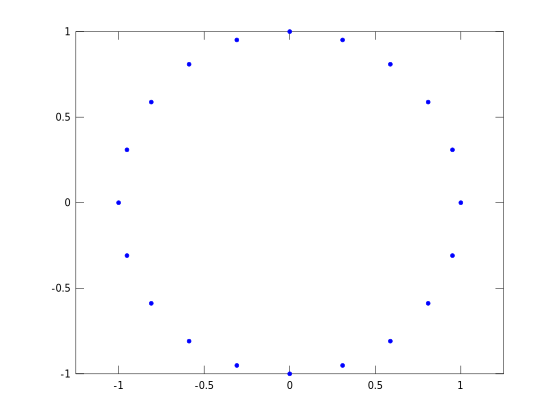

In [1]:
n = 20;                                                                                                                                               
                                                                                                                                                      
t = linspace(0, 2*pi, n);  #  n points in a linear sequence, starting at 0, ending at 2*pi                                                            
t = (0:(n-1)) * 2*pi/n;                                                                                                                               
                                                                                                                                                      
x1 = cos(t);                                                                                                                                          
x2 = sin(t);                                                                                                                                          
                                                                                                                                                      
plot(x1,x2, 'b.')                                                                                                                                     
axis equal    #  axis equal == make x and y axes the same scale (i.e., aspect ratio = 1.0)           

## Fancier plot: draw vectors (arrows) for each point on the circle

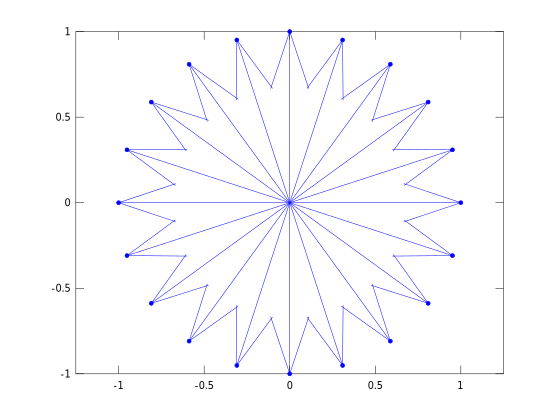

In [2]:
plot(x1,x2, 'b.')                                                                                                                                     
axis equal                                                                                                                                            
                                                                                                                                                      
hold on            #  hold on == "superimpose another plot on the current figure"                                                                     
for i=1:n                                                                                                                                             
   quiver( 0,0, x1(i), x2(i), 'b' );  # draw an arrow from (0,0) to v = (x1(i),x2(i))                                                                 
end                                                                                                                                                   
hold off

## Define a function for plotting vectors, and make it even prettier

drawvector =

@(v1, v2, color) quiver (0, 0, v1, v2, 0, color, 'MaxHeadSize', 0.05)



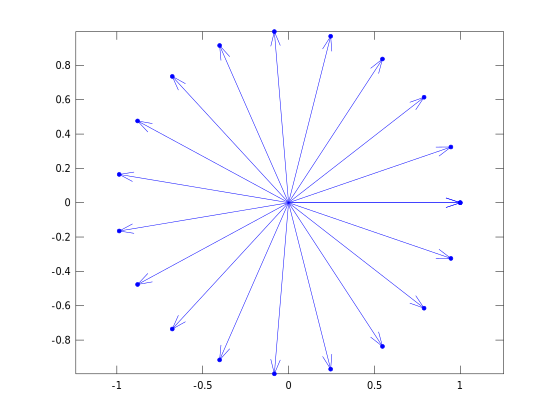

In [4]:
# function:  draw an arrow from (0,0) to v = (v1,v2)                                                                                                  
                                                                                                                                                      
drawvector = @(v1, v2, color)  quiver(0,0, v1,v2, 0,color, 'MaxHeadSize',0.05 )                                                                       
# the MaxHeadSize option makes the arrow heads smaller                                                                                                
                                                                                                                                                      
plot(x1,x2, 'b.')                                                                                                                                     
axis equal                                                                                                                                            
                                                                                                                                                      
hold on                                                                                                                                               
for i=1:n                                                                                                                                             
   drawvector( x1(i), x2(i), 'b' );                                                                                                                   
end                                                                                                                                                   
hold off

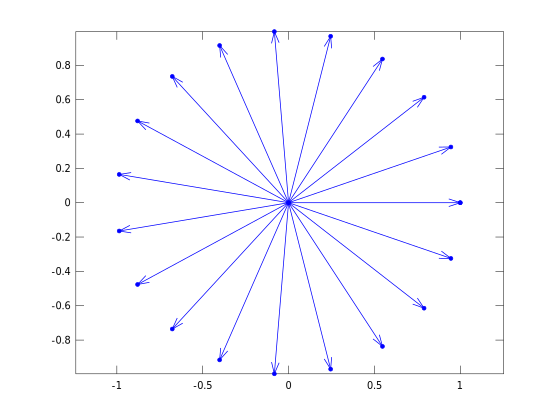

In [3]:
t = linspace(0, 2*pi, n);                                                                                                                             
                                                                                                                                                      
x1 = cos(t);                                                                                                                                          
x2 = sin(t);                                                                                                                                          
                                                                                                                                                      
z = zeros(n,1);                                                                                                                                       
                                                                                                                                                      
plot(x1,x2, 'b.')                                                                                                                                     
axis equal                                                                                                                                            
                                                                                                                                                      
hold on                                                                                                                                               
quiver( z, z, x1, x2, 0, 'b', 'MaxHeadSize',0.04, 'LineWidth',0.75 )  # thinner lines                                                                 
hold off

## Now translate each vector in the circle by a linear transformation

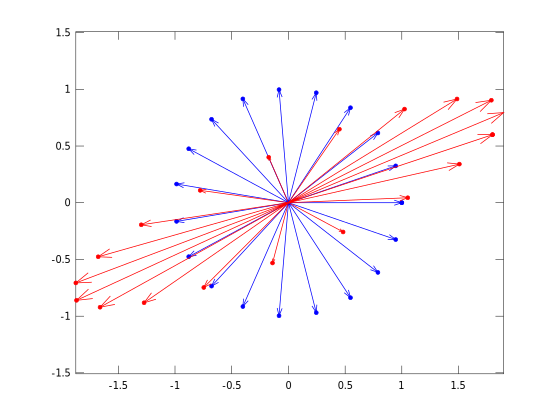

In [5]:
x = [ x1 ; x2 ];

A = [1.8 0.6 ; 0.6 0.7];  #  or any 2x2 matrix you want

Ax = A * x;

Ax1 = Ax(1,:);
Ax2 = Ax(2,:);


plot(x1,x2, 'b.')
axis equal
hold on

quiver( z, z, x1, x2, 0, 'b', 'MaxHeadSize',0.04, 'LineWidth',0.75 )

plot(Ax1, Ax2, 'r.')

quiver( z, z, Ax1, Ax2, 0, 'r', 'MaxHeadSize',0.04, 'LineWidth',0.75 )

hold off

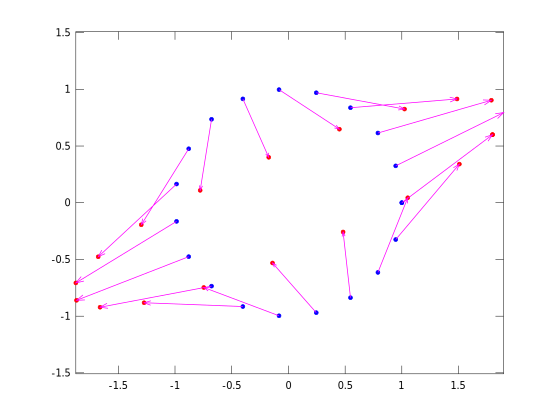

In [6]:
plot(x1,x2, 'b.')
axis equal

hold on

plot(Ax1, Ax2, 'r.')

quiver( x1, x2, Ax1-x1, Ax2-x2, 0, 'm', 'MaxHeadSize',0.04, 'LineWidth',0.75 )
# plot the change from x to A*x -- with magenta arrows

hold off

## Fancy diagram...

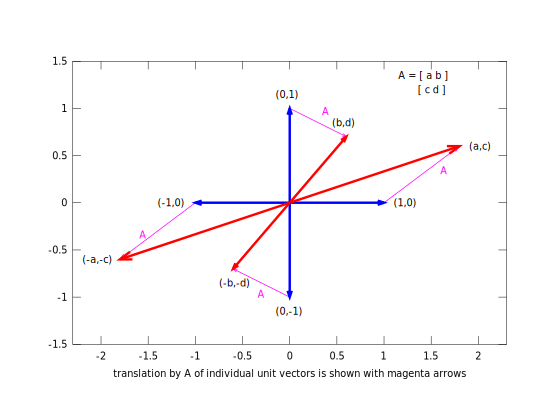

In [7]:
A = [1.8 0.6 ; 0.6 0.7];
n = 4;

xtext  = { '(1,0)', '(0,1)', '(-1,0)',  '(0,-1)'  };
Axtext = { '(a,c)', '(b,d)', '(-a,-c)', '(-b,-d)' };

t = linspace(0, 2*pi, n);
t = (0:(n-1)) * 2*pi/n;
x1 = cos(t);
x2 = sin(t);
x = [ x1 ; x2 ];
Ax = A * x;
Ax1 = Ax(1,:);
Ax2 = Ax(2,:);
xmax = max( 1.5, max(abs(Ax1))+0.5 );
ymax = max( 1.5, max(abs(Ax2))+0.5 );
drawvector = @(v,c,t,dx,dy) {quiver(0,0,v(1),v(2), 0,c, 'MaxHeadSize',0.04, 'LineWidth',2.5 ), ...
                             text( v(1) + dx, v(2) + dy, t )} ;
drawtranslation = @(x1,x2,y1,y2,c)  quiver(x1,x2,(y1-x1),(y2-x2), 0,c, ...
                             'LineWidth',0.75, 'MaxHeadSize',0.04);

hold on
axis([-xmax xmax -ymax ymax])
axis equal
xlabel('translation by A of individual unit vectors is shown with magenta arrows')
for i=1:n
   drawtranslation( x1(i),x2(i),  Ax1(i),Ax2(i), 'm' );
   text( (x1(i)+Ax1(i))*0.57, (x2(i)+Ax2(i))*0.57, 'A', 'Color', 'm' );
   drawvector(  x(:,i), 'b',  xtext(i), x1(i)*0.25-0.15, x2(i)*0.15  );
   drawvector( Ax(:,i), 'r', Axtext(i), x1(i)*0.25-0.15, x2(i)*0.15  );
end
text(  1.15, 1.35, 'A = [ a b ]')
text(  1.23, 1.20, '    [ c d ]')
hold off


## Vector Projection

In [8]:
u = [7.68 ; 2.24]

v = [3 ; 4]

lambda = (u' * v) / (u' * u)   %  = length of projection of v onto u

vector_projection_of_v_onto_u  =  lambda * u


u =

   7.6800
   2.2400

v =

   3
   4

lambda =  0.50000
vector_projection_of_v_onto_u =

   3.8400
   1.1200



## Fancy diagram...

u =

   7.6800
   2.2400

v =

   3
   4

origin =

   0
   0

lambda =  0.50000
w =

   3.8400
   1.1200

drawvector =

@(o, v, c) quiver (o (1), o (2), v (1), v (2), 0, c, 'MaxHeadSize', 0.04, 'LineWidth', 2)



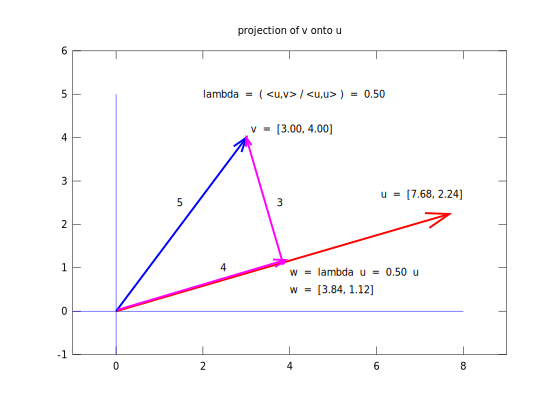

In [9]:
u = [7.68 ; 2.24]
v = [3 ; 4]
origin = [0; 0]

figure
axis([-1 9 -1 6])
axis equal
hold on
plot([-1;8], [0;0] )  % x-axis
plot([0;0],  [-1;5])  % y-axis
text(6.1,2.7, sprintf('u  =  [%4.2f, %4.2f]', u(1),u(2)))
text(3.1,4.2, sprintf('v  =  [%4.2f, %4.2f]', v(1),v(2)))
title('projection of v onto u')

lambda = (u' * v) / (u' * u)
w = lambda * u

drawvector = @(o,v,c)  quiver(o(1),o(2),v(1),v(2),0, c, 'MaxHeadSize',0.04,'LineWidth',2 )
drawvector( origin, u, 'r'  )
drawvector( origin, v, 'b'  )
drawvector( w,    v-w, 'm.' )
pause(5)
text(2.0,5.0, sprintf('lambda  =  ( <u,v> / <u,u> )  =  %4.2f', lambda))
text(4.0,0.9, sprintf('w  =  lambda  u  =  %4.2f  u', lambda))
text(4.0,0.5, sprintf('w  =  [%4.2f, %4.2f]', w(1),w(2)))
text(3.7,2.5, '3')
text(2.4,1.0, '4')
text(1.4,2.5, '5')
epsilon = 0.03;
drawvector( origin+epsilon, w+epsilon, 'm'  )
hold off


## Vector Length (and Norm)

In [10]:
u = [7.68 ; 2.24]

v = [3 ; 4]

disp(sprintf('length of u =? %f', u' * u ))
disp(sprintf('norm of u = %f', norm(u)))


disp(sprintf('length of v =? %f', v' * v ))
disp(sprintf('norm of v = %f', norm(v)))

u =

   7.6800
   2.2400

v =

   3
   4

length of u =? 64.000000
norm of u = 8.000000
length of v =? 25.000000
norm of v = 5.000000


## Incorrect mathematical definition of vector norm

$$norm(v) ~=~ <v,v> ~=~ v' * v ~=~ \sum_{i=1}^n ~ \overline{v_i} ~ v_i ~$$

Why is this definition incorrect?

## Discretized Functions

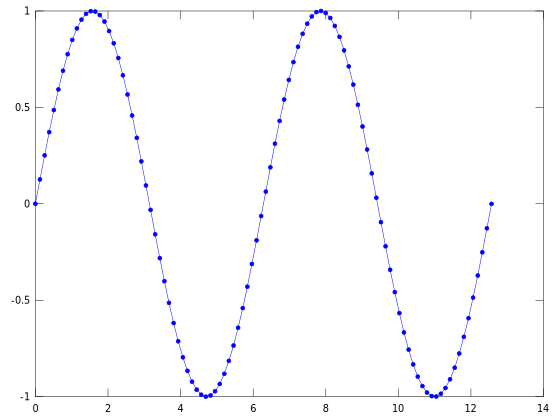

In [11]:
n = 100;
x = linspace(0, 4*pi, n);   %  x  =  vector of samples

f = @sin;                   %  f  =  sin
fx = sin(x);                %  fx is a discretized version of f

plot( x, fx, 'b.-' )

## Multiple views (subplots)

deltax =  0.12693


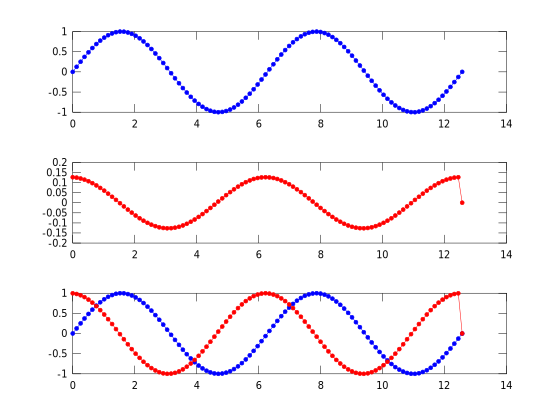

In [12]:
n = 100;
x = linspace(0, 4*pi, n);   %  x  =  vector of samples

f = @sin;                   %  f  =  sin
fx = sin(x);                %  fx = discretized f

subplot(3,1, 1)             %  1st of 3 plots
plot( x, fx, 'b.-' )

subplot(3,1, 2)             %  2nd of 3 plots
plot( x, [diff(fx) 0], 'r.-')

subplot(3,1, 3)             %  3rd of 3 plots
deltax = x(2) - x(1)
plot( x, fx, 'b.-',   x, [diff(fx)/deltax 0], 'r.-')


## Rotations

In [13]:
Rotation = @(t) [ cos(t) -sin(t) ; sin(t) cos(t) ]
%  define a function that returns a rotation matrix

theta = pi/2

R_theta = Rotation(theta)

R_theta_minus_theta = Rotation(theta) * Rotation(-theta)

R_theta_plus_theta = Rotation(theta) * Rotation(theta)

R_two_theta = Rotation(2 * theta)

phi = pi/4

R_theta_phi = Rotation(theta) * Rotation(phi)


Rotation =

@(t) [cos(t), -sin(t); sin(t), cos(t)]

theta =  1.5708
R_theta =

   6.1232e-17  -1.0000e+00
   1.0000e+00   6.1232e-17

R_theta_minus_theta =

   1   0
   0   1

R_theta_plus_theta =

  -1.0000e+00  -1.2246e-16
   1.2246e-16  -1.0000e+00

R_two_theta =

  -1.0000e+00  -1.2246e-16
   1.2246e-16  -1.0000e+00

phi =  0.78540
R_theta_phi =

  -0.70711  -0.70711
   0.70711  -0.70711

